In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('C:/Users/Rahul Soni/Downloads/Iris.csv')

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df.shape

(150, 6)

In [16]:
X = df.drop(['Species'], axis=1)

In [18]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [20]:
Y = df['Species']

In [22]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.20, random_state=0)

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, init="k-means++", n_init=10, random_state=101)

In [28]:
y_kmeans = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
X_np = X.values # To convert pandas dataframe to numpy array for plotting

In [48]:
print(kmeans.cluster_centers_)

[[ 75.5     5.936   2.77    4.26    1.326]
 [ 25.5     5.006   3.418   1.464   0.244]
 [125.5     6.588   2.974   5.552   2.026]]


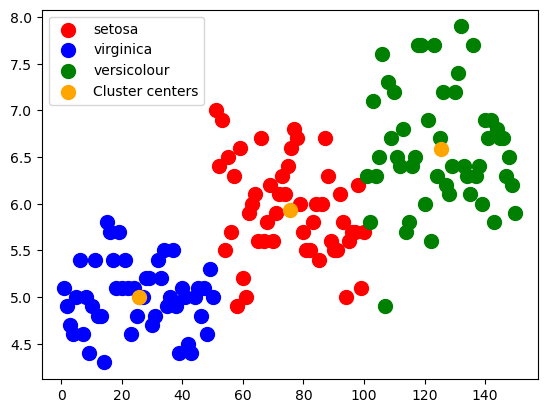

In [50]:
import matplotlib.pyplot as plt

plt.scatter(X_np[y_kmeans == 0, 0], X_np[y_kmeans == 0, 1], s=100, c='red', label='setosa' )
plt.scatter(X_np[y_kmeans == 1, 0], X_np[y_kmeans == 1, 1], s=100, c='blue', label='virginica' )
plt.scatter(X_np[y_kmeans == 2, 0],X_np[y_kmeans == 2, 1], s=100, c='green', label='versicolour' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c = 'orange',label='Cluster centers')

plt.legend()
plt.show()